In [98]:
import pandas as pd
from ast import literal_eval
import numpy as np
from sklearn.metrics import f1_score
from itertools import product
import matplotlib.pyplot as plt

In [99]:
PATH = 'percentages.csv'

In [100]:
df = pd.read_csv(PATH)
df.head()

,text_ids,labels,annotators_percentage,llama_percentage,mistral_percentage
0,medium-17,1,0.888889,0.333333,1.000000
1,medium-17,0,0.666667,0.000000,0.222222
2,medium-17,1,0.111111,1.000000,0.888889
3,medium-17,1,0.444444,0.888889,0.333333
4,medium-17,1,0.444444,0.000000,0.444444


In [101]:
labels = df['labels']
ann_percentage = df['annotators_percentage']
llama_percentage = df['llama_percentage']
mistral_percentage = df['mistral_percentage']

In [102]:
def divide(array):
    borders = [(0, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1.1)]
    
    values = []
    for range in borders:
        v = []
        for x in array:
            if (x >= range[0]) & (x < range[1]):
                v.append(x)
        
        values.append(v)
    return values

In [103]:
ann_divided = divide(ann_percentage)
llama_divided = divide(llama_percentage)
mistral_divided = divide(mistral_percentage)

In [104]:
def numbers_matrix(annotators, llm):
    matrix = []
    for x in llm:
        l1 = len(x)
        row = []
        for y in annotators:
            l2 = len(y)
            row.append(l1+l2)
        matrix.append(row)
    return np.array(matrix)

In [105]:
ann_llama_matrix = numbers_matrix(ann_divided, llama_divided)
ann_mistral_matrix = numbers_matrix(ann_divided, mistral_divided)
ann_llama_matrix, ann_mistral_matrix
# redovi su llmovi, stupci su anotatori

(array([[144, 105, 105,  95,  90,  80],
        [ 77,  38,  38,  28,  23,  13],
        [ 72,  33,  33,  23,  18,   8],
        [ 75,  36,  36,  26,  21,  11],
        [ 73,  34,  34,  24,  19,   9],
        [118,  79,  79,  69,  64,  54]]),
 array([[138,  99,  99,  89,  84,  74],
        [ 95,  56,  56,  46,  41,  31],
        [ 80,  41,  41,  31,  26,  16],
        [ 80,  41,  41,  31,  26,  16],
        [ 85,  46,  46,  36,  31,  21],
        [ 81,  42,  42,  32,  27,  17]]))

In [106]:
def make_labels(matrix):
    labels = []
    for row in matrix:
        row = [1 if x > 0.5 else 0 for x in row]
        labels.append(row)
    return labels

In [107]:
ann_labels = make_labels(ann_divided)
llama_labels = make_labels(llama_divided)
mistral_labels = make_labels(mistral_divided)

In [108]:
def calculate_f1s(matrix):
    f1s = []
    for row in matrix:
        labels = np.ones(len(row))
        f1s.append(f1_score(labels, row))
    return f1s

In [109]:
ann_f1s = calculate_f1s(ann_labels)
llama_f1s = calculate_f1s(llama_labels)
mistral_f1s = calculate_f1s(mistral_labels)
ann_f1s, llama_f1s, mistral_f1s

([0.0, 0.782608695652174, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.7499999999999999, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0])

In [110]:
def f1_matrix(annotators, llm):
    matrix = []
    for x in llm:
        row = []
        for y in annotators:
            row.append(np.mean([x, y]))
        matrix.append(row)
    return np.array(matrix)

In [111]:
ann_llama_f1s = f1_matrix(ann_f1s, llama_f1s)
ann_mistral_f1s = f1_matrix(ann_f1s, mistral_f1s)

In [116]:
def plot_matrix(numbers, f1s, title):
    plt.imshow(f1s, cmap='magma', interpolation='nearest')
    for i in range(numbers.shape[0]):
        for j in range(numbers.shape[1]):
            if f1s[i, j] < 0.5:
                color = 'white'
            else: 
                color = 'black'
            plt.text(j, i, str(numbers[i, j]), ha='center', va='center', color=color)
            
    plt.xlabel('Annotators')
    plt.ylabel('Model')
    
    plt.xticks(np.arange(f1s.shape[1]), ['50%', '60%', '70%', '80%', '90%', '100%'])
    plt.yticks(np.arange(f1s.shape[0]), ['50%', '60%', '70%', '80%', '90%', '100%'])
    plt.gca().invert_yaxis()
    
    plt.title(title)
    plt.colorbar()
    plt.show()

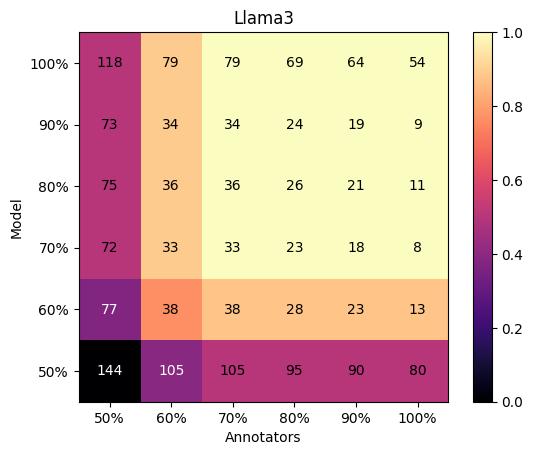

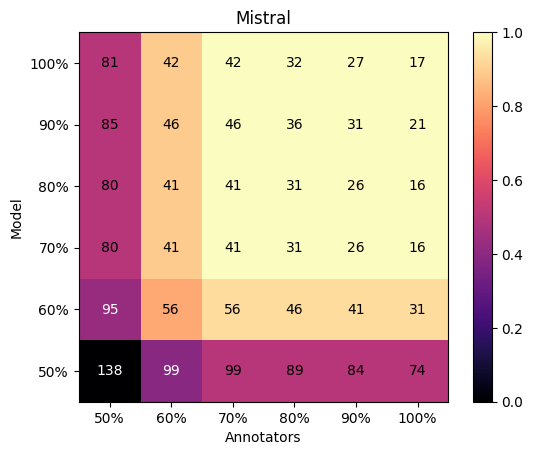

In [117]:
plot_matrix(ann_llama_matrix, ann_llama_f1s, 'Llama3')
plot_matrix(ann_mistral_matrix, ann_mistral_f1s, 'Mistral')